# Supermarket Power Usage Analysis

This notebook analyzes the power usage data from a supermarket, including trends, correlations, and potential insights for optimization.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "supermarket_power_usage_10_days.csv"
df = pd.read_csv(file_path)


df.head()


,Date,Time,Temperature (°C),Number of People,Air Conditioning Usage (kWh),Lighting Usage (kWh),Total Power Usage (kWh)
0,2024-11-01,00:00,9.0,0,20.0,20,40.0
1,2024-11-01,01:00,10.2,0,20.0,20,40.0
2,2024-11-01,02:00,9.7,0,20.0,20,40.0
3,2024-11-01,03:00,11.5,0,20.0,20,40.0
4,2024-11-01,04:00,12.5,0,20.0,20,40.0


In [2]:


df.info()

d
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          240 non-null    object 
 1   Time                          240 non-null    object 
 2   Temperature (°C)              240 non-null    float64
 3   Number of People              240 non-null    int64  
 4   Air Conditioning Usage (kWh)  240 non-null    float64
 5   Lighting Usage (kWh)          240 non-null    int64  
 6   Total Power Usage (kWh)       240 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


,Temperature (°C),Number of People,Air Conditioning Usage (kWh),Lighting Usage (kWh),Total Power Usage (kWh)
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,14.441667,69.704167,32.195833,32.125000,64.320833
std,3.615045,81.909992,17.475817,15.005752,32.255913
min,9.000000,0.000000,20.000000,20.000000,40.000000
25%,11.300000,0.000000,20.000000,20.000000,40.000000
50%,14.000000,15.000000,20.000000,20.000000,40.000000
75%,17.500000,151.250000,47.700000,50.000000,97.700000
max,20.000000,216.000000,70.000000,60.000000,130.000000


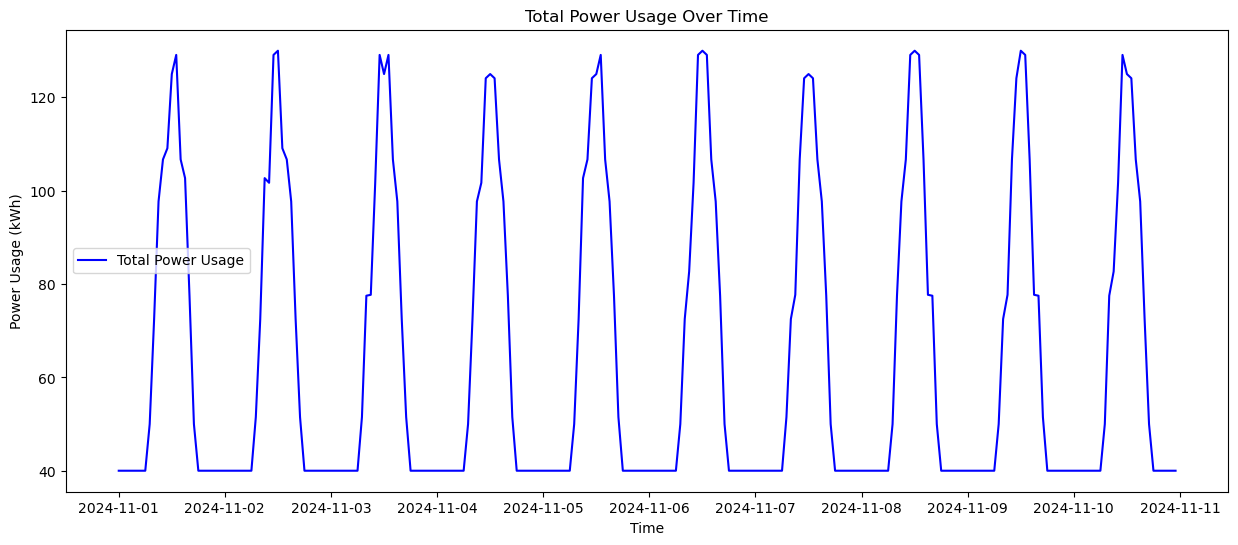

In [3]:

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)


df.drop(['Date', 'Time'], axis=1, inplace=True)

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Total Power Usage (kWh)'], label='Total Power Usage', color='blue')
plt.title('Total Power Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Power Usage (kWh)')
plt.legend()
plt.show()


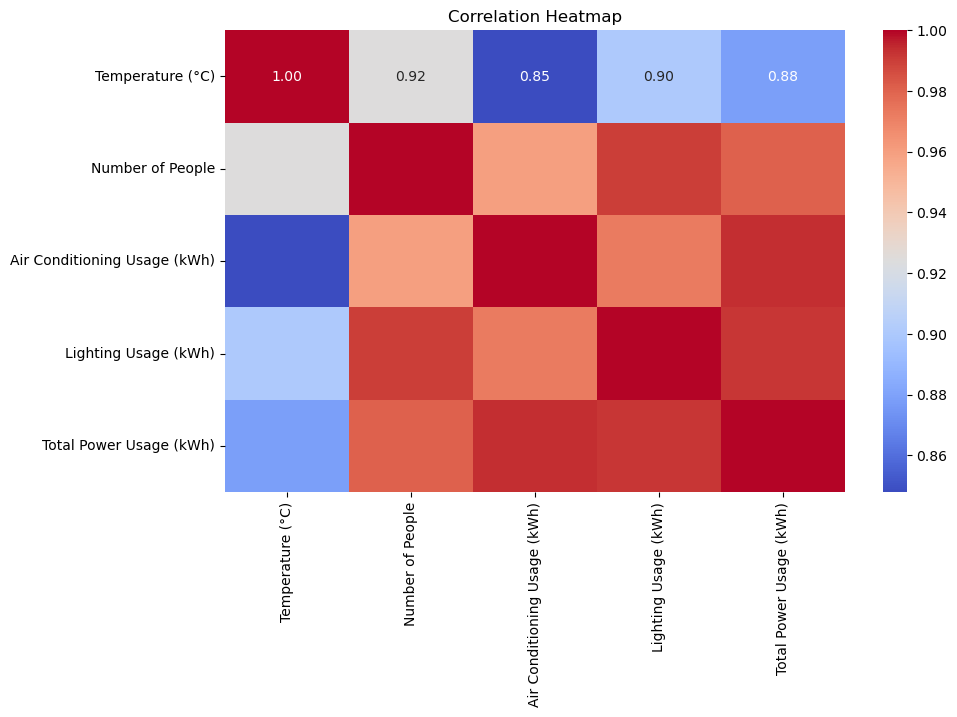

In [4]:


correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Insights and Next Steps

- Identify periods of low activity and explore reducing lighting or HVAC usage during these times.
- Investigate correlations between temperature, foot traffic, and energy usage for optimization opportunities.
- Consider anomaly detection models for unexpected spikes in power usage.
- Develop predictive models to forecast power needs and schedule tasks efficiently.

Mean Absolute Error: 0.09462500000001188 kWh


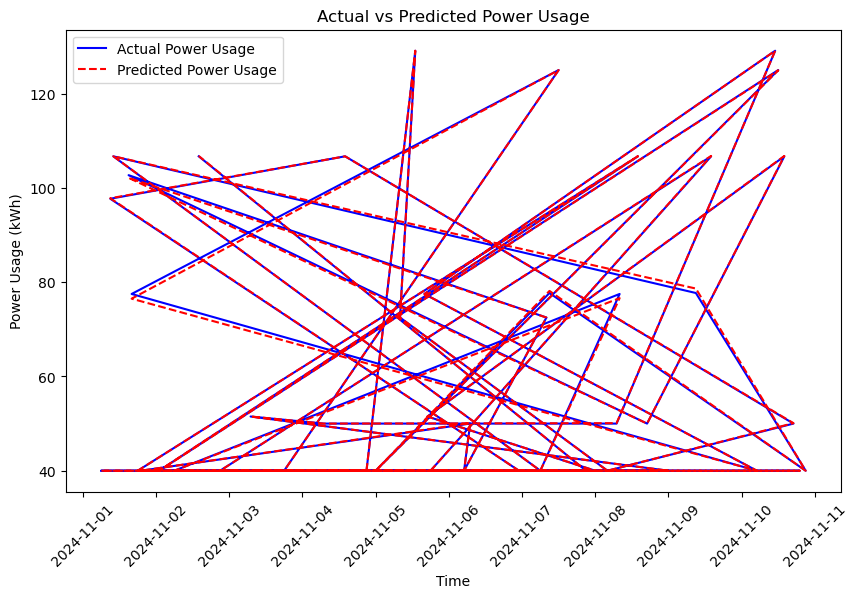

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error




df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(['Date', 'Time'], axis=1)
df = df.set_index('Datetime')

df['Hour'] = df.index.hour
df['DayofWeek'] = df.index.dayofweek
df['Month'] = df.index.month

features = df[['Temperature (°C)', 'Number of People', 'Hour', 'DayofWeek', 'Month']]
target = df['Total Power Usage (kWh)']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae} kWh")


plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Power Usage', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Power Usage', color='red', linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power Usage (kWh)')
plt.title('Actual vs Predicted Power Usage')
plt.xticks(rotation=45)
plt.show()

In [41]:



future_date = '2024-11-11'
future_data = pd.DataFrame({
    'Temperature (°C)': [22] * 24, 
    'Number of People': [50, 40, 35, 30, 25, 20, 20, 30, 40, 60, 70, 80, 85, 90, 85, 80, 70, 65, 60, 55, 50, 45, 40, 35],  
    'Hour': range(24),
    'DayofWeek': [pd.Timestamp(future_date).dayofweek] * 24,
    'Month': [pd.Timestamp(future_date).month] * 24
})


future_predictions = model.predict(future_data)

predicted_data = pd.DataFrame({
    'Hour': future_data['Hour'],
    'Predicted Power Usage (kWh)': future_predictions
})

output_path = 'predicted_power_usage_2024-11-11.csv'
predicted_data.to_csv(output_path, index=False)

print(f"Predicted power usage for {future_date} saved to: {output_path}")

Predicted power usage for 2024-11-11 saved to: predicted_power_usage_2024-11-11.csv


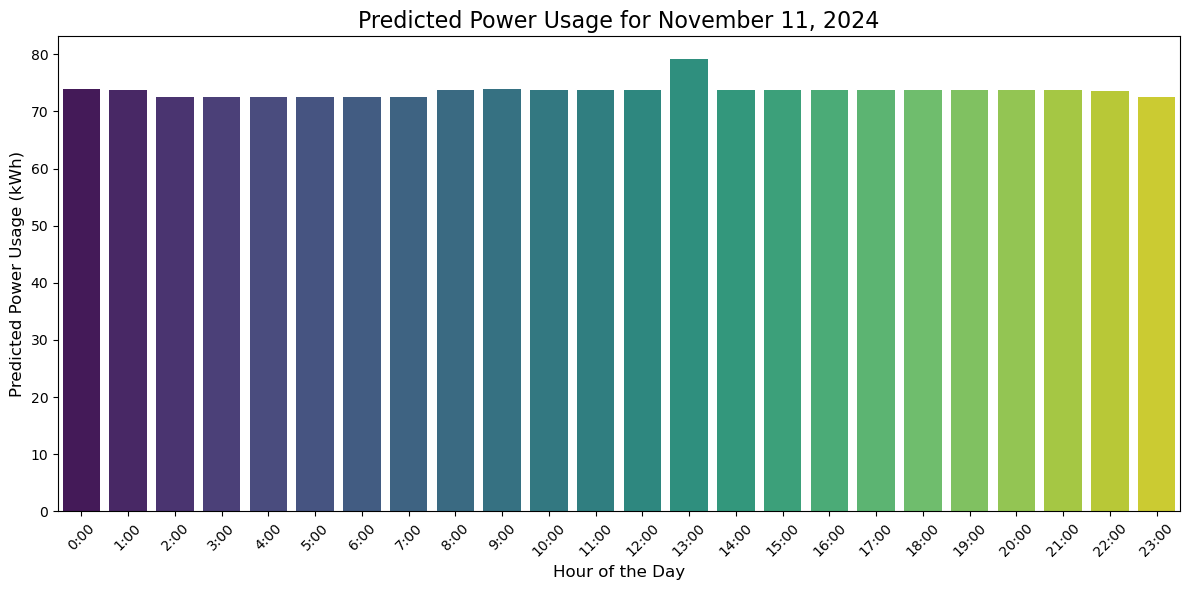

In [43]:
predicted_data = pd.read_csv('predicted_power_usage_2024-11-11.csv')
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Predicted Power Usage (kWh)', data=predicted_data, palette='viridis')
plt.title('Predicted Power Usage for November 11, 2024', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Predicted Power Usage (kWh)', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{hour}:00" for hour in range(24)], rotation=45)
plt.tight_layout()
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


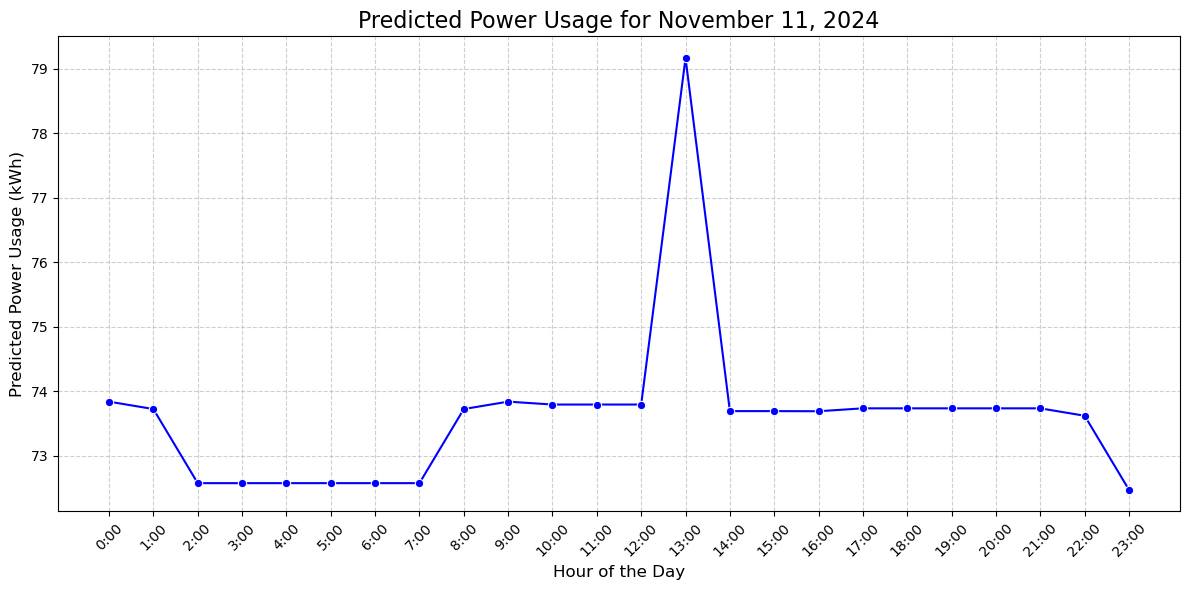

In [45]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Predicted Power Usage (kWh)', data=predicted_data, marker='o', color='blue')

plt.title('Predicted Power Usage for November 11, 2024', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Predicted Power Usage (kWh)', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{hour}:00" for hour in range(24)], rotation=45)


plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [51]:
predicted_data

,Hour,Predicted Power Usage (kWh)
0,0,73.836
1,1,73.721
2,2,72.571
3,3,72.571
4,4,72.571
5,5,72.571
6,6,72.571
7,7,72.571
8,8,73.721
9,9,73.836


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

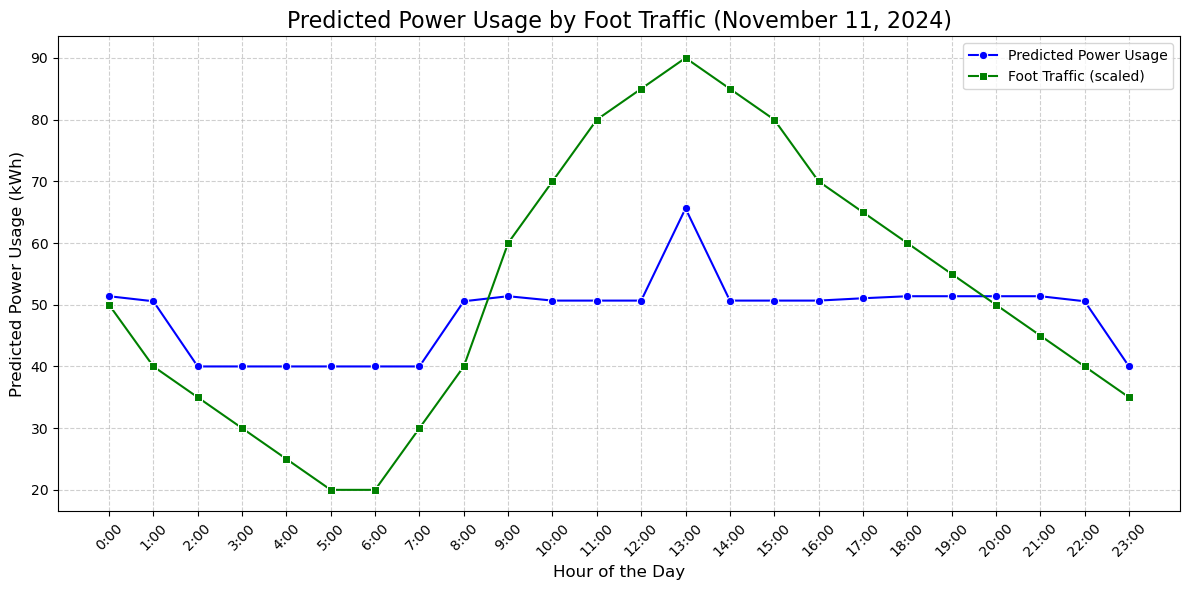

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'supermarket_power_usage_10_days.csv'
data = pd.read_csv(file_path)

data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.drop(['Date', 'Time'], axis=1)
data = data.set_index('Datetime')

features = data[['Number of People']]
target = data['Total Power Usage (kWh)']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

future_date = '2024-11-11'
foot_traffic_pattern = [50, 40, 35, 30, 25, 20, 20, 30, 40, 60, 70, 80, 85, 90, 85, 80, 70, 65, 60, 55, 50, 45, 40, 35]

future_data = pd.DataFrame({'Number of People': foot_traffic_pattern})
future_predictions = model.predict(future_data)

predicted_data = pd.DataFrame({
    'Hour': range(24),
    'Number of People': foot_traffic_pattern,
    'Predicted Power Usage (kWh)': future_predictions
})

output_path = 'predicted_power_usage_by_foot_traffic.csv'
predicted_data.to_csv(output_path, index=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Predicted Power Usage (kWh)', data=predicted_data, marker='o', label='Predicted Power Usage', color='blue')
sns.lineplot(x='Hour', y='Number of People', data=predicted_data, marker='s', label='Foot Traffic (scaled)', color='green')

plt.title('Predicted Power Usage by Foot Traffic (November 11, 2024)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Predicted Power Usage (kWh)', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{hour}:00" for hour in range(24)], rotation=45)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
s

Mean Absolute Error: 0.09462500000001188 kWh


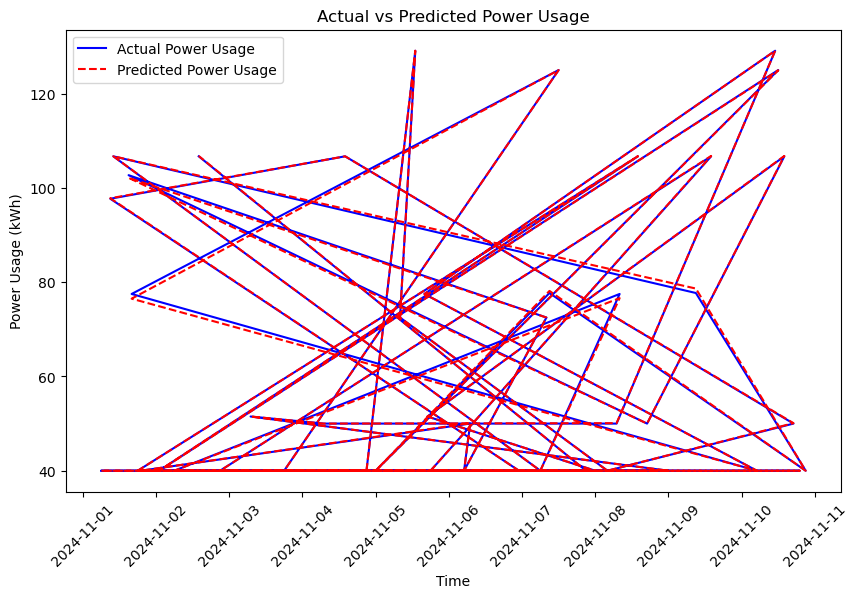

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load your data (if not already loaded)
file_path = 'supermarket_power_usage_10_days.csv'
df = pd.read_csv(file_path)

# Preprocess the data
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(['Date', 'Time'], axis=1)
df = df.set_index('Datetime')

# Feature Engineering: Add time-related features
df['Hour'] = df.index.hour
df['DayofWeek'] = df.index.dayofweek
df['Month'] = df.index.month

# Split the data into features and target
features = df[['Temperature (°C)', 'Number of People', 'Hour', 'DayofWeek', 'Month']]
target = df['Total Power Usage (kWh)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae} kWh")

# Plot actual vs predicted power usage
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Power Usage', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Power Usage', color='red', linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power Usage (kWh)')
plt.title('Actual vs Predicted Power Usage')
plt.xticks(rotation=45)
plt.show()

In [25]:
import pandas as pd

# Load the original dataset
file_path = 'supermarket_power_usage_10_days.csv'  # Update the path if needed
data = pd.read_csv(file_path)

# Create a simplified version of the dataset
simplified_data = data[['Date', 'Time', 'Temperature (°C)', 'Number of People', 'Total Power Usage (kWh)']]

# Save the simplified data to a new CSV file
simplified_csv_path = 'simplified_supermarket_power_usage.csv'  # Output file path
simplified_data.to_csv(simplified_csv_path, index=False)

print(f"Simplified CSV file created at: {simplified_csv_path}")

Simplified CSV file created at: simplified_supermarket_power_usage.csv


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load your data
file_path = 'supermarket_power_usage_10_days.csv'
data = pd.read_csv(file_path)

# Preprocess the data
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.drop(['Date', 'Time'], axis=1)
data = data.set_index('Datetime')

# Feature engineering: Add time-based features
data['Hour'] = data.index.hour
data['DayofWeek'] = data.index.dayofweek
data['Month'] = data.index.month

# Split data into features and target
features = data[['Temperature (°C)', 'Number of People', 'Hour', 'DayofWeek', 'Month']]
target = data['Total Power Usage (kWh)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Generate predictions for a specific day (e.g., November 11, 2024)
future_date = '2024-11-11'
future_data = pd.DataFrame({
    'Temperature (°C)': [22] * 24,  # Replace with your expected hourly temperatures
    'Number of People': [50, 40, 35, 30, 25, 20, 20, 30, 40, 60, 70, 80, 85, 90, 85, 80, 70, 65, 60, 55, 50, 45, 40, 35],  # Example foot traffic
    'Hour': range(24),
    'DayofWeek': [pd.Timestamp(future_date).dayofweek] * 24,
    'Month': [pd.Timestamp(future_date).month] * 24
})

# Predict power usage
future_predictions = model.predict(future_data)

# Save predictions to a new DataFrame
predicted_data = pd.DataFrame({
    'Hour': future_data['Hour'],
    'Predicted Power Usage (kWh)': future_predictions
})

# Save the predictions to a CSV file
output_path = 'predicted_power_usage_2024-11-11.csv'
predicted_data.to_csv(output_path, index=False)

print(f"Predicted power usage for {future_date} saved to: {output_path}")

Predicted power usage for 2024-11-11 saved to: predicted_power_usage_2024-11-11.csv


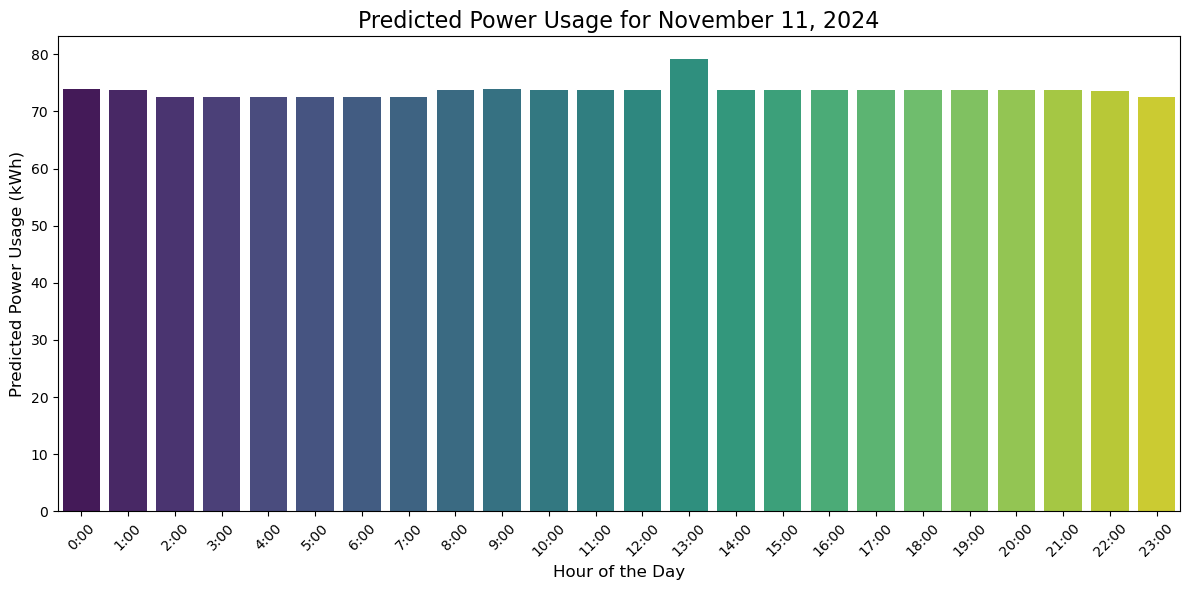

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the predicted data (from the CSV file generated previously)
predicted_data = pd.read_csv('predicted_power_usage_2024-11-11.csv')  # Update file path if needed

# Create a bar plot for the predicted power usage
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Predicted Power Usage (kWh)', data=predicted_data, palette='viridis')

# Add labels and title
plt.title('Predicted Power Usage for November 11, 2024', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Predicted Power Usage (kWh)', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{hour}:00" for hour in range(24)], rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


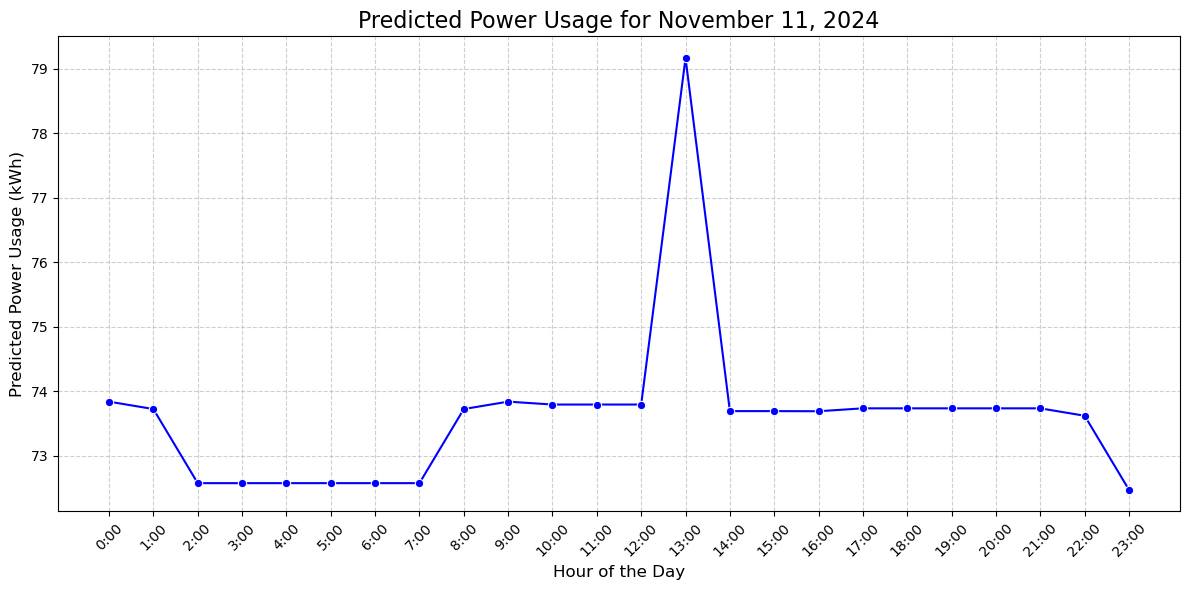

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the predicted data (from the CSV file generated previously)
predicted_data = pd.read_csv('predicted_power_usage_2024-11-11.csv')  # Update file path if needed

# Create a line plot for the predicted power usage
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Predicted Power Usage (kWh)', data=predicted_data, marker='o', color='blue')

# Add labels and title
plt.title('Predicted Power Usage for November 11, 2024', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Predicted Power Usage (kWh)', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{hour}:00" for hour in range(24)], rotation=45)

# Customize grid and display
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Predicted power usage by foot traffic saved to: predicted_power_usage_by_foot_traffic.csv


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

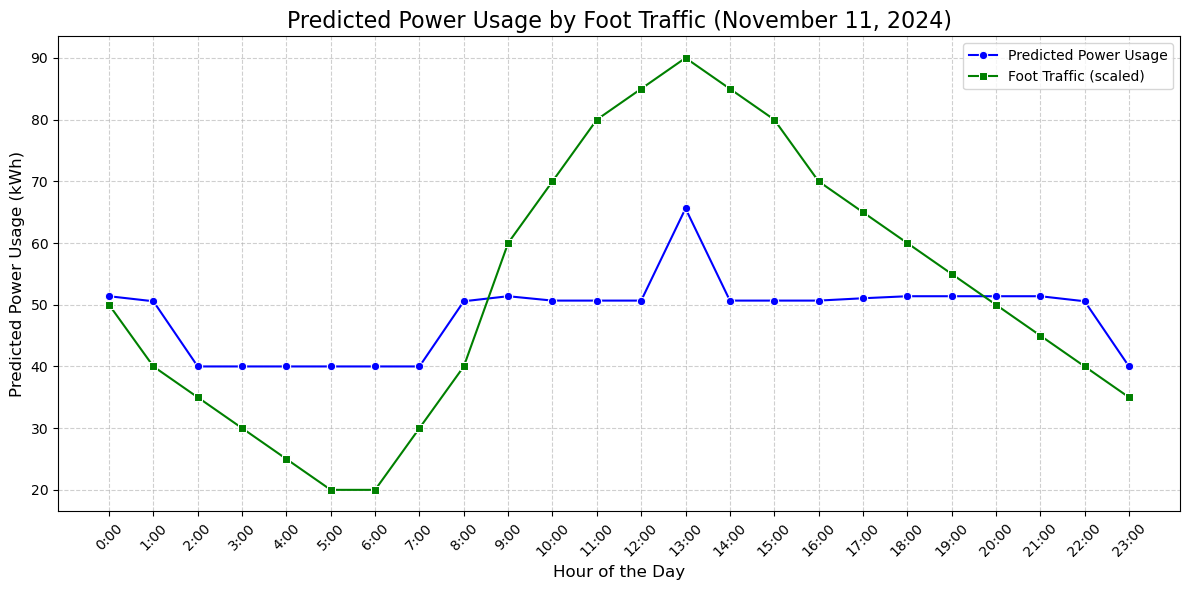

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'supermarket_power_usage_10_days.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

# Preprocess the data
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.drop(['Date', 'Time'], axis=1)
data = data.set_index('Datetime')

# Select foot traffic as the primary feature
features = data[['Number of People']]  # Use only foot traffic
target = data['Total Power Usage (kWh)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Generate predictions for a specific day based on foot traffic
future_date = '2024-11-11'
foot_traffic_pattern = [50, 40, 35, 30, 25, 20, 20, 30, 40, 60, 70, 80, 85, 90, 85, 80, 70, 65, 60, 55, 50, 45, 40, 35]  # Example pattern

future_data = pd.DataFrame({'Number of People': foot_traffic_pattern})
future_predictions = model.predict(future_data)

# Save predictions to a DataFrame
predicted_data = pd.DataFrame({
    'Hour': range(24),
    'Number of People': foot_traffic_pattern,
    'Predicted Power Usage (kWh)': future_predictions
})

# Save predictions to a CSV file
output_path = 'predicted_power_usage_by_foot_traffic.csv'
predicted_data.to_csv(output_path, index=False)

print(f"Predicted power usage by foot traffic saved to: {output_path}")

# Plot predictions as a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Predicted Power Usage (kWh)', data=predicted_data, marker='o', label='Predicted Power Usage', color='blue')
sns.lineplot(x='Hour', y='Number of People', data=predicted_data, marker='s', label='Foot Traffic (scaled)', color='green')

# Add labels and title
plt.title('Predicted Power Usage by Foot Traffic (November 11, 2024)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Predicted Power Usage (kWh)', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{hour}:00" for hour in range(24)], rotation=45)
plt.legend()

# Customize grid and display
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()